In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("../data/03_data_selected_features.csv")
X = df.drop("target", axis=1)
y = df["target"]

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

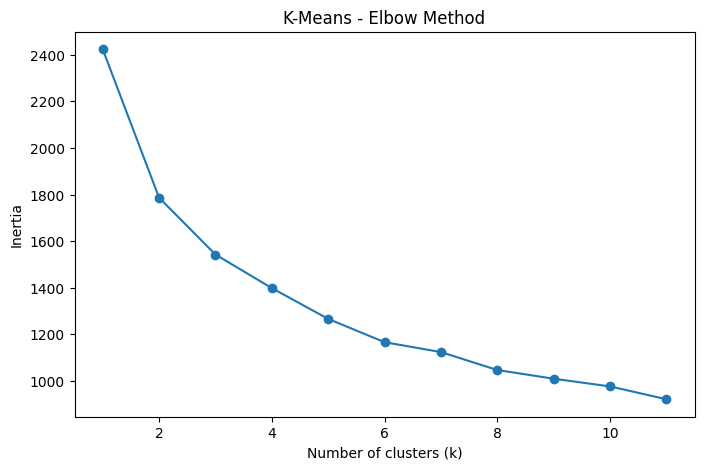

In [4]:
inertia = []
K = range(1, 12)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("K-Means - Elbow Method")
plt.show()

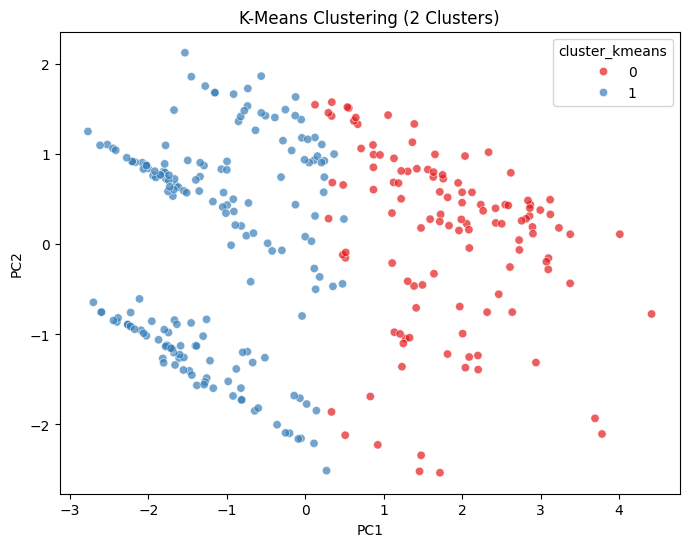

In [5]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df["cluster_kmeans"] = kmeans.fit_predict(X_scaled)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["cluster_kmeans"], palette="Set1", alpha=0.7)
plt.title("K-Means Clustering (2 Clusters)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

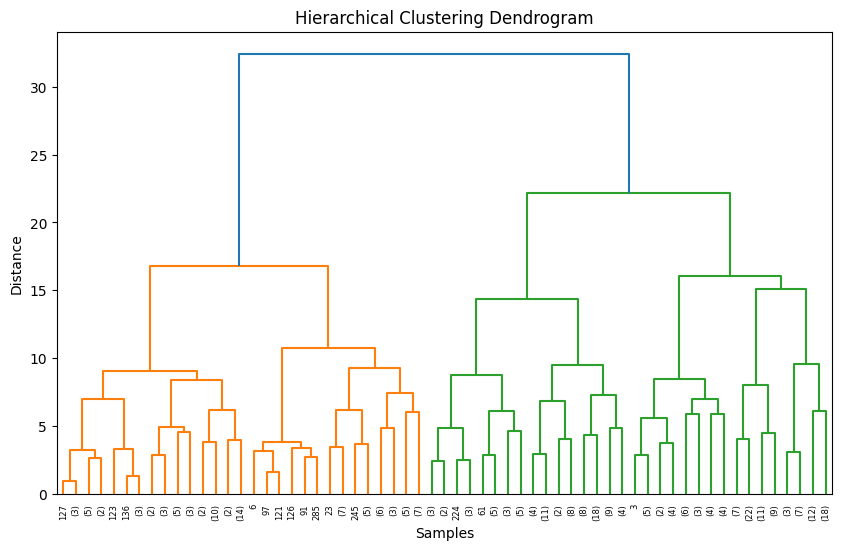

In [6]:
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [8]:
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
df["cluster_hc"] = hc.fit_predict(X_scaled)

In [9]:
print("K-Means Cluster Counts:")
print(df.groupby(["cluster_kmeans", "target"]).size())

print("\nHierarchical Cluster Counts:")
print(df.groupby(["cluster_hc", "target"]).size())

K-Means Cluster Counts:
cluster_kmeans  target
0               0          15
                1         103
1               0         149
                1          36
dtype: int64

Hierarchical Cluster Counts:
cluster_hc  target
0           0         152
            1          53
1           0          12
            1          86
dtype: int64
